## Amitesh Kumar Jha 
## XLRI DS-10: 101975

## House Price Prediction in US

In this project, the primary objective is to forecast future residential property prices by leveraging a machine learning model. 
The training process involves the utilization of data acquired from the US Federal Reserve and housing price data obtained from Zillow. 
The amalgamation of these datasets is followed by the application of a Random Forest Model. Subsequently, error assessment is executed through backtesting, facilitating model enhancement through the inclusion of novel predictor variables.

### Files Needed

Following five data csv files are required for this project:
1. CPIAUCSL.csv - US CPI (inflation measure) https://fred.stlouisfed.org/series/CPIAUCSL
2. RRVRUSQ156N.csv - rental vacancy rate, quarterly https://fred.stlouisfed.org/series/RRVRUSQ156N
3. MORTGAGE30US.csv - mortgage interest rates, weekly https://fred.stlouisfed.org/series/MORTGAGE30US
4. Metro_median_sale_price_uc_sfrcondo_week.csv - median sale price for US houses https://www.zillow.com/research/data/
5. Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv - Zillow home value index https://www.zillow.com/research/data/

### Loading US Federal Reserve Data

In [1]:
import pandas as pd

fed_res_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]

dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_res_files]

In [2]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2023-11-02,7.76
2023-11-09,7.50
2023-11-16,7.44


In [3]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2022-07-01,6.0
2022-10-01,5.8
2023-01-01,6.4


In [4]:
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2023-06-01,303.841
2023-07-01,304.348
2023-08-01,306.269


In [5]:
fed_res_data = pd.concat(dfs, axis=1)

In [6]:
fed_res_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2023-11-02,7.76,NaN,NaN
2023-11-09,7.50,NaN,NaN
2023-11-16,7.44,NaN,NaN


In [7]:
fed_res_data = fed_res_data.ffill().dropna()

In [8]:
fed_res_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2023-11-02,7.76,6.6,307.619
2023-11-09,7.50,6.6,307.619
2023-11-16,7.44,6.6,307.619


### Loading Zillow House Price Data

In [9]:
zillow_data = ["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

dfs = [pd.read_csv(f) for f in zillow_data]

In [10]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2023-08-05,2023-08-12,2023-08-19,2023-08-26,2023-09-02,2023-09-09,2023-09-16,2023-09-23,2023-09-30,2023-10-07
0,102001,0,United States,country,NaN,177000.0,172000.0,173040.0,169500.0,178000.0,...,350000.0,345000.0,349000.0,345000.0,345000.0,339900.0,338975.0,332000.0,340000.0,337500.0
1,394913,1,"New York, NY",msa,NY,395000.0,407500.0,412000.0,410000.0,386000.0,...,599000.0,600000.0,598000.0,615251.0,599000.0,600000.0,585000.0,560000.0,584500.0,560000.0
2,753899,2,"Los Angeles, CA",msa,CA,459750.0,467000.0,478500.0,485000.0,461000.0,...,900250.0,900000.0,914000.0,880000.0,892000.0,875000.0,900000.0,870000.0,885000.0,890000.0
3,394463,3,"Chicago, IL",msa,IL,228000.0,220000.0,225000.0,215000.0,230000.0,...,318000.0,315000.0,315000.0,300000.0,310000.0,300500.0,299000.0,295000.0,308000.0,300000.0
4,394514,4,"Dallas, TX",msa,TX,137500.0,132900.0,140080.0,138000.0,139536.0,...,395000.0,389000.0,380000.0,390000.0,380000.0,380000.0,377805.0,375697.0,379500.0,372500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,394928,410,"Ocean City, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,472500.0,727500.0,415000.0,499500.0,450000.0,437500.0,821000.0,572400.0,675000.0,565000.0
260,394674,467,"Heber, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,975546.0,1350000.0,900000.0,831282.0,720000.0,748770.0,954951.0,700000.0,1203823.0,1137499.0
261,394877,491,"Morehead City, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,342500.0,424000.0,415000.0,320000.0,408000.0,400000.0,605000.0,549000.0,522000.0,499000.0
262,394402,577,"Boone, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,532500.0,325000.0,480000.0,550000.0,340000.0,428750.0,672500.0,416000.0,394750.0,493500.0


In [11]:
dfs[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
0,102001,0,United States,country,NaN,100581.133321,100835.783232,101375.613291,102109.735827,102902.382038,...,331104.193745,330312.216498,332798.077110,337245.461564,341664.303346,346042.226429,348607.616009,349413.437182,349083.392092,347972.362580
1,394913,1,"New York, NY",msa,NY,176835.535617,176107.108312,175938.098686,176160.355533,177014.271541,...,597853.418824,592970.013786,596120.569502,604080.815668,611083.284750,618516.111694,624554.391005,627245.273581,628423.761106,629444.687126
2,753899,2,"Los Angeles, CA",msa,CA,182832.575388,183962.396584,184817.483178,185179.937857,185813.491054,...,844798.103919,843818.477158,852525.763766,865780.776494,878258.363216,893068.174276,903276.932844,908081.097171,911198.013095,912049.245818
3,394463,3,"Chicago, IL",msa,IL,127679.126256,127095.196967,128489.124743,130145.134229,131682.304478,...,283301.348427,282611.376720,285716.712824,290740.661045,296214.567315,302122.638288,305892.292804,307458.535991,307369.953110,306750.759061
4,394514,4,"Dallas, TX",msa,TX,107546.058517,108210.113517,109242.178342,110074.811191,110572.549187,...,361206.472405,360170.323121,362407.395332,365980.750144,369834.151906,373126.628314,374107.271682,373386.307263,371237.311912,368644.763686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,114585.155387,113344.337622,114888.001540,116760.826466,116248.258649,117530.306240,119251.049754,118827.689480,117118.680255,114177.416942
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,378141.832153,377162.026311,375742.088984,377562.645462,384869.341226,388827.674146,391618.338403,389107.224573,383616.043434,376650.679728
892,753874,937,"Craig, CO",msa,CO,67607.019069,67953.500093,68749.166730,68981.806091,70125.305397,...,261295.949316,260958.828171,263014.239406,268469.780866,272881.433622,279763.795985,283055.476884,283718.293998,284594.119622,284959.884718
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,88244.050363,88731.510650,91517.547220,93784.254915,95620.773584,94671.138146,94378.569949,93103.975858,91189.484708,89751.157720


In [12]:
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]
for df in dfs:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [13]:
dfs[0]

,0,month
2008-02-02,177000.0,2008-02
2008-02-09,172000.0,2008-02
2008-02-16,173040.0,2008-02
2008-02-23,169500.0,2008-02
2008-03-01,178000.0,2008-03
...,...,...
2023-09-09,339900.0,2023-09
2023-09-16,338975.0,2023-09
2023-09-23,332000.0,2023-09
2023-09-30,340000.0,2023-09


In [14]:
dfs[1]

,0,month
1996-02-29,100581.133321,1996-02
1996-03-31,100835.783232,1996-03
1996-04-30,101375.613291,1996-04
1996-05-31,102109.735827,1996-05
1996-06-30,102902.382038,1996-06
...,...,...
2023-06-30,346042.226429,2023-06
2023-07-31,348607.616009,2023-07
2023-08-31,349413.437182,2023-08
2023-09-30,349083.392092,2023-09


In [15]:
price_data = dfs[1].merge(dfs[0], on="month")

In [16]:
price_data.index = dfs[0].index

In [17]:
price_data

,0_x,month,0_y
2008-02-02,194710.76049,2008-02,177000.0
2008-02-09,194710.76049,2008-02,172000.0
2008-02-16,194710.76049,2008-02,173040.0
2008-02-23,194710.76049,2008-02,169500.0
2008-03-01,193420.023594,2008-03,178000.0
...,...,...,...
2023-09-09,349083.392092,2023-09,339900.0
2023-09-16,349083.392092,2023-09,338975.0
2023-09-23,349083.392092,2023-09,332000.0
2023-09-30,349083.392092,2023-09,340000.0


In [18]:
del price_data["month"]
price_data.columns = ["price", "value"]

In [19]:
price_data

,price,value
2008-02-02,194710.76049,177000.0
2008-02-09,194710.76049,172000.0
2008-02-16,194710.76049,173040.0
2008-02-23,194710.76049,169500.0
2008-03-01,193420.023594,178000.0
...,...,...
2023-09-09,349083.392092,339900.0
2023-09-16,349083.392092,338975.0
2023-09-23,349083.392092,332000.0
2023-09-30,349083.392092,340000.0


### Preparing Data For Machine Learning

In [20]:
fed_res_data = fed_res_data.dropna()

In [21]:
fed_res_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2023-11-02,7.76,6.6,307.619
2023-11-09,7.50,6.6,307.619
2023-11-16,7.44,6.6,307.619


In [22]:
# Aligning Fedral Reserve Data with Zillow Data
from datetime import timedelta

fed_res_data.index = fed_res_data.index + timedelta(days=2)

In [23]:
fed_res_data.tail(10)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2023-10-03,7.31,6.6,307.619
2023-10-07,7.49,6.6,307.619
2023-10-14,7.57,6.6,307.619
2023-10-21,7.63,6.6,307.619
2023-10-28,7.79,6.6,307.619
2023-11-04,7.76,6.6,307.619
2023-11-11,7.50,6.6,307.619
2023-11-18,7.44,6.6,307.619
2023-11-24,7.29,6.6,307.619


In [24]:
price_data

,price,value
2008-02-02,194710.76049,177000.0
2008-02-09,194710.76049,172000.0
2008-02-16,194710.76049,173040.0
2008-02-23,194710.76049,169500.0
2008-03-01,193420.023594,178000.0
...,...,...
2023-09-09,349083.392092,339900.0
2023-09-16,349083.392092,338975.0
2023-09-23,349083.392092,332000.0
2023-09-30,349083.392092,340000.0


In [25]:
price_data = fed_res_data.merge(price_data, left_index=True, right_index=True)

In [26]:
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,price,value
2008-02-02,5.68,10.1,212.174,194710.76049,177000.0
2008-02-09,5.67,10.1,212.687,194710.76049,172000.0
2008-02-16,5.72,10.1,212.687,194710.76049,173040.0
2008-02-23,6.04,10.1,212.687,194710.76049,169500.0
2008-03-01,6.24,10.1,212.687,193420.023594,178000.0
...,...,...,...,...,...
2023-09-09,7.12,6.6,307.481,349083.392092,339900.0
2023-09-16,7.18,6.6,307.481,349083.392092,338975.0
2023-09-23,7.19,6.6,307.481,349083.392092,332000.0
2023-09-30,7.31,6.6,307.481,349083.392092,340000.0


In [27]:
price_data.columns = ["interest", "vacancy", "cpi", "price", "value"]

In [28]:
price_data

,interest,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,194710.76049,177000.0
2008-02-09,5.67,10.1,212.687,194710.76049,172000.0
2008-02-16,5.72,10.1,212.687,194710.76049,173040.0
2008-02-23,6.04,10.1,212.687,194710.76049,169500.0
2008-03-01,6.24,10.1,212.687,193420.023594,178000.0
...,...,...,...,...,...
2023-09-09,7.12,6.6,307.481,349083.392092,339900.0
2023-09-16,7.18,6.6,307.481,349083.392092,338975.0
2023-09-23,7.19,6.6,307.481,349083.392092,332000.0
2023-09-30,7.31,6.6,307.481,349083.392092,340000.0


### Setting Up The Machine Learning Target

In [29]:
price_data["adj_price"] = price_data["price"] / price_data["cpi"] * 100
price_data["adj_value"] = price_data["value"] / price_data["cpi"] * 100

<AxesSubplot:>

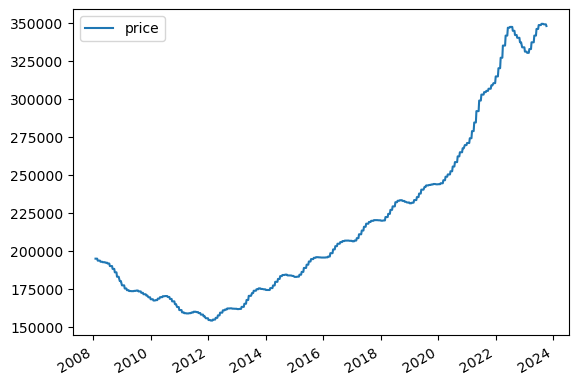

In [30]:
price_data.plot.line(y="price", use_index=True)

<AxesSubplot:>

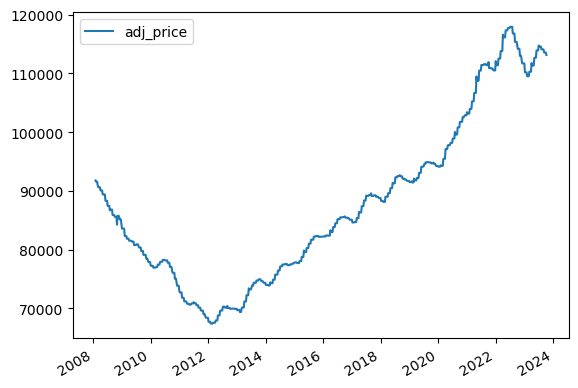

In [31]:
price_data.plot.line(y="adj_price", use_index=True)

In [32]:
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

In [33]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,194710.76049,177000.0,91769.378194,83422.096958,89387.277452
2008-02-09,5.67,10.1,212.687,194710.76049,172000.0,91548.030905,80870.010861,89387.277452
2008-02-16,5.72,10.1,212.687,194710.76049,173040.0,91548.030905,81358.992322,89387.277452
2008-02-23,6.04,10.1,212.687,194710.76049,169500.0,91548.030905,79694.574657,89387.277452
2008-03-01,6.24,10.1,212.687,193420.023594,178000.0,90941.159353,83691.057752,89387.277452
...,...,...,...,...,...,...,...,...
2023-09-09,7.12,6.6,307.481,349083.392092,339900.0,113530.069205,110543.415691,NaN
2023-09-16,7.18,6.6,307.481,349083.392092,338975.0,113530.069205,110242.584095,NaN
2023-09-23,7.19,6.6,307.481,349083.392092,332000.0,113530.069205,107974.151248,NaN
2023-09-30,7.31,6.6,307.481,349083.392092,340000.0,113530.069205,110575.938025,NaN


In [34]:
price_data.dropna(inplace=True)

In [35]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,194710.76049,177000.0,91769.378194,83422.096958,89387.277452
2008-02-09,5.67,10.1,212.687,194710.76049,172000.0,91548.030905,80870.010861,89387.277452
2008-02-16,5.72,10.1,212.687,194710.76049,173040.0,91548.030905,81358.992322,89387.277452
2008-02-23,6.04,10.1,212.687,194710.76049,169500.0,91548.030905,79694.574657,89387.277452
2008-03-01,6.24,10.1,212.687,193420.023594,178000.0,90941.159353,83691.057752,89387.277452
...,...,...,...,...,...,...,...,...
2023-06-10,6.71,6.3,303.841,346042.226429,345000.0,113889.246819,113546.229771,113530.069205
2023-06-17,6.69,6.3,303.841,346042.226429,352500.0,113889.246819,116014.626071,113530.069205
2023-06-24,6.67,6.3,303.841,346042.226429,350000.0,113889.246819,115191.827304,113530.069205
2023-07-01,6.71,6.3,303.841,348607.616009,355000.0,114733.566572,116837.424837,113530.069205


In [36]:
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)

In [37]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,194710.76049,177000.0,91769.378194,83422.096958,89387.277452,0
2008-02-09,5.67,10.1,212.687,194710.76049,172000.0,91548.030905,80870.010861,89387.277452,0
2008-02-16,5.72,10.1,212.687,194710.76049,173040.0,91548.030905,81358.992322,89387.277452,0
2008-02-23,6.04,10.1,212.687,194710.76049,169500.0,91548.030905,79694.574657,89387.277452,0
2008-03-01,6.24,10.1,212.687,193420.023594,178000.0,90941.159353,83691.057752,89387.277452,0
...,...,...,...,...,...,...,...,...,...
2023-06-10,6.71,6.3,303.841,346042.226429,345000.0,113889.246819,113546.229771,113530.069205,0
2023-06-17,6.69,6.3,303.841,346042.226429,352500.0,113889.246819,116014.626071,113530.069205,0
2023-06-24,6.67,6.3,303.841,346042.226429,350000.0,113889.246819,115191.827304,113530.069205,0
2023-07-01,6.71,6.3,303.841,348607.616009,355000.0,114733.566572,116837.424837,113530.069205,0


In [38]:
price_data["change"].value_counts()

1    439
0    344
Name: change, dtype: int64

In [39]:
predictors = ["interest", "vacancy", "adj_price", "adj_value"]
target = "change"

### Creating A Machine Learning Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

start = 260
step = 52

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds


### Creating A Backtesting Engine

In [41]:
def backtest(data, predictors, target):
    all_preds = []
    for i in range(start, data.shape[0], step):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+step)]
        all_preds.append(predict(train, test, predictors, target))
    
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[start:][target], preds)

### Measuring Error

In [42]:
preds, accuracy = backtest(price_data, predictors, target)

In [43]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [44]:
accuracy

0.5640535372848948

 ### Improving Accuracy

In [45]:
yearly = price_data.rolling(52, min_periods=1).mean()

In [46]:
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

In [47]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change,interest_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,5.68,10.1,212.174,194710.76049,177000.0,91769.378194,83422.096958,89387.277452,0,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,194710.76049,172000.0,91548.030905,80870.010861,89387.277452,0,0.999119,1.000000,0.998793,0.984466
2008-02-16,5.72,10.1,212.687,194710.76049,173040.0,91548.030905,81358.992322,89387.277452,0,1.005272,1.000000,0.999195,0.993592
2008-02-23,6.04,10.1,212.687,194710.76049,169500.0,91548.030905,79694.574657,89387.277452,0,1.045435,1.000000,0.999396,0.979814
2008-03-01,6.24,10.1,212.687,193420.023594,178000.0,90941.159353,83691.057752,89387.277452,0,1.063032,1.000000,0.994208,1.023026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-10,6.71,6.3,303.841,346042.226429,345000.0,113889.246819,113546.229771,113530.069205,0,1.079947,1.036053,1.004631,1.043975
2023-06-17,6.69,6.3,303.841,346042.226429,352500.0,113889.246819,116014.626071,113530.069205,0,1.071884,1.033765,1.005277,1.067187
2023-06-24,6.67,6.3,303.841,346042.226429,350000.0,113889.246819,115191.827304,113530.069205,0,1.065757,1.031486,1.005925,1.060604
2023-07-01,6.71,6.3,303.841,348607.616009,355000.0,114733.566572,116837.424837,113530.069205,0,1.069192,1.029218,1.013891,1.075927


In [48]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [49]:
accuracy

0.6367112810707457

### Running Diagnostics On The Model

In [50]:
pred_match = (preds == price_data[target].iloc[start:])
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

<AxesSubplot:xlabel='index', ylabel='adj_price'>

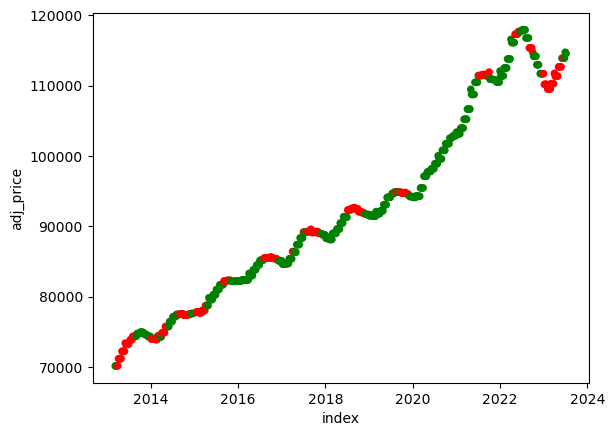

In [51]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[start:].copy()

plot_data.reset_index().plot.scatter(x="index", y="adj_price", color=pred_match)

In [52]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=10, random_state=1)

In [53]:
result["importances_mean"]

array([0.17969349, 0.31277139, 0.21213282, 0.08978289])

In [54]:
predictors

['interest', 'vacancy', 'adj_price', 'adj_value']